In [1]:
import pandas as pd
import numpy as np
import scienceplots as sp
import matplotlib.pyplot as plt

In [2]:
EM=pd.read_csv("Emission trajectories.csv")#排放量文件
PR=pd.read_excel("pyplot.xlsx",sheet_name="Price")#碳价文件
CP2025=pd.read_csv("New Capacity2025-pork.csv")#补贴增加的capacity文件
CP2030=pd.read_csv("New Capacity2030-pork.csv")
CP2035=pd.read_csv("New Capacity2035-pork.csv")
CP2040=pd.read_csv("New Capacity2040-pork.csv")
CP2045=pd.read_csv("New Capacity2045-pork.csv")
CP2050=pd.read_csv("New Capacity2050-pork.csv")

SD1=pd.read_excel("cost_reduction_v4.xlsx", sheet_name="wind and solar")#补贴量文件
SD2=pd.read_excel("cost_reduction_v4.xlsx", sheet_name="other REs")#补贴量文件

In [3]:
Year=EM["Year"]
EmB=EM["Baseline Emissions"]
EmPO=EM["Pork Emissions"]
EmPaS=EM["Pork-and-stick emissions"]
Price=PR["Price"]

In [4]:
ED=[]#emission difference
Spending1=[]
for i in range(4,10):#2025~2050
    EDi=EmB[i]-EmPO[i]
    ED.append(EDi)
    spending=(EDi*Price[i-4])*12/44  #1990$/tC
    Spending1.append(spending)
    #print(Year[i])
#print(len(ED))
#print("Unit: million 1990$")

Text(0.5, 1.0, 'Carbon pricing cost, million 1990$')

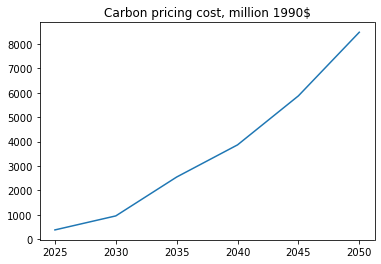

In [5]:
Year2=Year[4:10]
plt.plot(Year2, Spending1)
plt.title("Carbon pricing cost, million 1990$")

In [6]:
NewCost2=SD2["New cost"]
OldCost2=SD2["Originalcost"]
CA2025=CP2025["Capacity added,kW"]
CA2030=CP2030["Capacity added,kW"]
CA2035=CP2035["Capacity added,kW"]
CA2040=CP2040["Capacity added,kW"]
CA2045=CP2045["Capacity added,kW"]
CA2050=CP2050["Capacity added,kW"]
CA=[CA2025,CA2030,CA2035,CA2040,CA2045,CA2050]
Time=SD2["Year"]
#CA.head(5)

In [7]:
# #technology-去掉"year=2025"
# Files=[CP2025, CP2030,CP2035,CP2040,CP2045,CP2050]
# for file in Files:
#     Tech=file["Technology"]

#     print(Tech[1:5])
#     for i in range(len(Tech)):
#         Tech[i] = Tech[i].replace(',year=2025','')
#         Tech[i] = Tech[i].replace(',year=2030','')
#         Tech[i] = Tech[i].replace(',year=2035','')
#         Tech[i] = Tech[i].replace(',year=2040','')
#         Tech[i] = Tech[i].replace(',year=2045','')
#         Tech[i] = Tech[i].replace(',year=2050','')
#     #print(Tech[1:5])

In [8]:
# Tech=CP2025["Technology"]
# Cost_diff=[]

# # for i in range(len(Tech)):
# for i in range(5):
#     tech_name = "name=" + Tech[i].replace(',year=2025','')
#     print(tech_name)
#     Total_cost_diff=0
#     for type in ["name=capital", "name=cooling system"]:
       
#         DF = SD2[(SD2["Technology"] == tech_name) & (SD2["Year"] == 2025) & (SD2["Cost type"] == type)]
# #         print(DF["Originalcost"].tolist()[0])
#         original_cost = DF["Originalcost"].tolist()[0]
#         new_cost = DF["New cost"].tolist()[0]
#         cost_diff = original_cost - new_cost
#         Total_cost_diff=Total_cost_diff+cost_diff
#     Cost_diff.append(Total_cost_diff)
#     print(Cost_diff[i])

name=gas (CC) (cooling pond)
0.0
name=biomass (conv) (seawater)
410.79999999999995
name=refined liquids (CC) (dry cooling)
0.0
name=biomass (conv) (cooling pond)
412.0
name=gas (CC) (dry cooling)
0.0


In [12]:
Files=[CP2025, CP2030,CP2035,CP2040,CP2045,CP2050]
SUBSIDY=[]
Years=[2025,2030,2035,2040,2045,2050]
NAMES=["SUB2025","SUB2030","SUB2035","SUB2040","SUB2045","SUB2050"]
TECHS=["tech2025","tech2030","tech2035","tech2040","tech2045","tech2050"]
for j in range(len(Files)):
    file=Files[j]

    Tech=file["Technology"]
    #print(Tech)
    Cost_diff=[]

    for i in range(len(Tech)):
    #for i in range(5):
        tech_name = "name=" + Tech[i].replace(',year={}'.format(Years[j]),'')
        
        #print(tech_name)
        Total_cost_diff=0
        #print(len(SD2))
        for tp in ["name=capital", "name=cooling system"]:
            DF = SD2[(SD2["Technology"] == tech_name) & (SD2["Year"] == Years[j]) & (SD2["Cost type"] == tp)]
            #print(len(DF))
            if len(DF) == 0:
                continue
#                 print("wrong df")
#                 print(file, type, tech_name, DF)
#         print(DF["Originalcost"].tolist()[0])
            original_cost = DF["Originalcost"].tolist()[0]
            new_cost = DF["New cost"].tolist()[0]
            cost_diff = original_cost - new_cost
            Total_cost_diff=Total_cost_diff+cost_diff
        Cost_diff.append(Total_cost_diff)
#         print(Cost_diff[i])

    
    SUB=[]#subsidy*capacity
    for i in range(len(CA[j])):
        SUB.append(CA[j][i]*(OldCost2[i]-NewCost2[i]))
    #print(CA[i])
    #print(len(Tech))
    #print(len(SUB))
    SUB2={'Technology': Tech,
                     'Subsidy': SUB}
    SUBT=pd.DataFrame(SUB2)

    SUBSIDY=pd.concat([SUBSIDY,SUB2],join='outer',axis=1)
    
#     SUBSIDY['Tech']=Tech
#     SUBSIDY['Subsidy']=SUB
#     SUBSIDY['{}'.format(TECHS[j])]=Tech
#     SUBSIDY['{}'.format(NAMES[j])]=SUB
#     SUBT.to_csv("{}.csv".format(NAMES[j]))

# SUBSIDYDF=pd.DataFrame(SUBSIDY)
type(SUBSIDY)
#print(SUBSIDY)
# SUBSIDYDF.to_csv("Subsidy_total.csv")

TypeError: cannot concatenate object of type '<class 'list'>'; only Series and DataFrame objs are valid

In [11]:
wuyijia=[1,2]
print(type(wuyijia))
# type(1)

TypeError: 'str' object is not callable

In [ ]:
# Subsidy=[]
# for i in range(len(OldCost2)):
#     if Time[i]=2025:
#         if 
#         Subsidy.append(NewCost2*)

In [ ]:
# SUB=[]#subsidy*capacity
# for i in range(len(CA)):
#     SUB.append(CA[i]*(OldCost2[i]-NewCost2[i]))
#     #print(CA[i])
# print(len(SUB))

In [ ]:
#Years=[2025,2030,2035,2040,2045,2050]
plt.figure(dpi=800, figsize=(20,14))
plt.bar(Year2, Spending1)
plt.bar(Year2, SUB, bottom=Spending1)

In [ ]:
# GEN_all_years = np.array([F2025, F2030, F2035, F2040, F2045, F2050])
# print(GEN_all_years[:, 0])
# # len(GenTechClean)
# Year=["2025","2030","2035","2040","2045","2050"]
# #Year=["1990","2005","2010","2015","2020","2025","2030","2035","2040","2045","2050"]
# # 绘图


# # plt.style.use(['science', 'no-latex'])
# #with plt.style.use('science'):
#     # 图形和轴
# colormap = mpl.cm.Set3.colors
# fig, ax = plt.subplots(1, figsize=(12, 10))
# bottom = len(Year) * [0]
# for i in range(len(Fuels)):
#     plt.bar(Year, GEN_all_years[:, i], bottom = bottom, label = Fuels[i], color=colormap[i])
#     bottom += GEN_all_years[:, i]
# # for idx, name in enumerate(fields):
# #     plt.barh(df_grouped.index, df_grouped[name], left = left, color=colors[idx])
# #     left = left + df_grouped[name]

# # 标题、图例、标签
# plt.title('Total generation by sector, EJ (Original)', loc='left')
# # plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
# plt.ylabel('Generation, EJ')
# plt.xlabel("Year")
# plt.legend()